In [39]:
# import libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import re

In [27]:
#checking the dataset:

data = pd.read_csv('Data Carrard et al. 2022 MedTeach.csv')

In [6]:
data.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [7]:
data.describe()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,889.709932,22.383747,3.102709,1.695260,14.327314,0.563205,0.348758,25.288939,3.777652,0.224605,106.374718,58.525959,34.784424,23.150113,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,515.555875,3.300664,1.763937,0.472665,32.366389,0.496269,0.476847,15.927875,1.061497,0.417558,8.784012,6.570341,5.377062,4.993220,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,2.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,447.500000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,3.000000,0.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,876.000000,22.000000,3.000000,2.000000,1.000000,1.000000,0.000000,25.000000,4.000000,0.000000,107.000000,58.000000,35.000000,23.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,1341.750000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,36.000000,5.000000,0.000000,113.000000,63.000000,39.000000,26.750000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,1790.000000,49.000000,6.000000,3.000000,121.000000,1.000000,1.000000,70.000000,5.000000,1.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


In [9]:
#checking null values in the dataset:

data.isna().sum()

id           0
age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

In [11]:
# checking the outliers in age column:

display(data["age"].nlargest(10))

417    49
520    44
571    39
737    38
60     37
432    37
771    37
278    35
393    35
774    35
Name: age, dtype: int64

In [18]:
data.duplicated().sum()

0

In [28]:
#converting the sex column to string instead of integer in the new column: 

data['Gender'] = data['sex'].replace([1,2,3], ['Man', 'Woman', 'Non-binary'])


In [30]:
# converting the glang (native language) column to string instead of integer in the new column: 

data['Native Language'] = data['glang'].replace([1, 15, 20, 37, 51, 52, 53, 54, 59, 60, 62, 63, 82, 83, 84, 85, 86, 87,
                                                 88, 89, 90, 92, 93, 94, 95, 96, 98, 100, 101, 102, 104, 106, 108, 112,
                                                 113, 114, 116, 117, 118, 119, 120, 121], ['French', 
                                                 'German',
                                                 'English',
                                                 'Arab',
                                                 'Basque',
                                                 'Bulgarian', 
                                                 'Catalan', 
                                                 'Chinese',
                                                 'Korean',
                                                 'Croatian',
                                                 'Danish',
                                                 'Spanish',
                                                 'Estonian',
                                                 'Finnish',
                                                 'Galician',
                                                 'Greek',
                                                 'Hebrew',
                                                 'Hindi',
                                                 'Hungarian',
                                                 'Indonesian',
                                                 'Italian',
                                                 'Japanese',
                                                 'Kazakh',
                                                 'Latvian',
                                                 'Lithuanian', 
                                                 'Malay',
                                                 'Dutch',
                                                 'Norwegian',
                                                 'Polish',
                                                 'Portuguese',
                                                 'Romanian',
                                                 'Russian',
                                                 'Serbian', 
                                                 'Slovak',
                                                 'Slovenian',
                                                 'Swedish',
                                                 'Czech',
                                                 'Thai', 
                                                 'Turkish',
                                                 'Ukrainian', 
                                                 'Vietnamese', 
                                                 'Other'])

In [34]:
# converting the health column to string instead of integer in existing column: 
data = data.replace({
    'health': {
        1: 'Verydissatisfied',
        2:'Dissatisfied',
        3:'Neither satisfied nor dissatisfied',
        4:'Satisfied',
        5:'Verysatisfied'
    }
})


,id,age,year,sex,glang,part,job,stud_h,health,psyt,...,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,Gender,Native Language
0,2,18,1,1,120,1,0,56,Neither satisfied nor dissatisfied,0,...,27,17,0.738095,34,61,17,13,20,Man,Vietnamese
1,4,26,4,1,1,1,0,20,Satisfied,0,...,37,22,0.690476,7,33,14,11,26,Man,French
2,9,21,3,2,1,0,0,36,Neither satisfied nor dissatisfied,0,...,39,17,0.690476,25,73,24,7,23,Woman,French
3,10,21,2,2,1,0,1,51,Verysatisfied,0,...,33,18,0.833333,17,48,16,10,21,Woman,French
4,13,21,3,1,1,1,0,22,Satisfied,0,...,28,21,0.690476,14,46,22,14,23,Man,French
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1781,21,2,1,1,1,0,45,Neither satisfied nor dissatisfied,0,...,39,28,0.619048,41,39,23,4,34,Man,French
882,1785,20,2,2,1,0,0,13,Neither satisfied nor dissatisfied,0,...,40,21,0.809524,26,41,17,5,24,Woman,French
883,1787,19,1,1,1,0,0,50,Verysatisfied,0,...,31,24,0.547619,14,45,15,8,31,Man,French
884,1789,24,5,2,1,0,0,20,Dissatisfied,1,...,39,21,0.785714,33,58,22,15,19,Woman,French


In [37]:
# dropping the sex and glang column (no need repetitive data):

dropped_data = data.drop(["sex", "glang", ], axis=1)

dropped_data.head()

,id,age,year,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,Gender,Native Language
0,2,18,1,1,0,56,Neither satisfied nor dissatisfied,0,88,62,27,17,0.738095,34,61,17,13,20,Man,Vietnamese
1,4,26,4,1,0,20,Satisfied,0,109,55,37,22,0.690476,7,33,14,11,26,Man,French
2,9,21,3,0,0,36,Neither satisfied nor dissatisfied,0,106,64,39,17,0.690476,25,73,24,7,23,Woman,French
3,10,21,2,0,1,51,Verysatisfied,0,101,52,33,18,0.833333,17,48,16,10,21,Woman,French
4,13,21,3,1,0,22,Satisfied,0,102,58,28,21,0.690476,14,46,22,14,23,Man,French


In [38]:
#reordering the columns:

new_columns_order = ["id", "age", "Gender", "year", "part", "Native Language", "job", "stud_h", "health", "psyt", "jspe", "qcae_cog", "qcae_aff",
                     "amsp", "erec_mean", "cesd", "stai_t", "mbi_ex", "mbi_cy", "mbi_ea"]
reordered_data = dropped_data[new_columns_order]

reordered_data.head()

,id,age,Gender,year,part,Native Language,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,Man,1,1,Vietnamese,0,56,Neither satisfied nor dissatisfied,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,Man,4,1,French,0,20,Satisfied,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,Woman,3,0,French,0,36,Neither satisfied nor dissatisfied,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,Woman,2,0,French,1,51,Verysatisfied,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,Man,3,1,French,0,22,Satisfied,0,102,58,28,21,0.690476,14,46,22,14,23


In [59]:
reordered_data.rename(columns = {'part':'Partner', 'age': 'Age', 'year':'Year', 'health': 'Health', 'job': 'Job',
                              'stud_h':'Hours studying per Week', 'psyt':'Last year Psychotherapy',
                              'jspe': 'JSPE total empathy score', 'qcae_cog':'QCAE Cognitive empathy score',
                              'qcae_aff': 'QCAE Affective empathy score', 'amsp':'AMSP total score',
                              'erec_mean': 'GERT mean value of correct responses', 'cesd':'CES-D total score',
                              'stai_t': 'STAI score', 'mbi_ex':'MBI Emotional Exhaustion','mbi_cy':'MBI Cynicism',
                              'mbi_ea':'MBI Academic Efficacy'}, inplace = True)
reordered_data.head()

,id,Age,Gender,Year,Partner,Native Language,Job,Hours studying per Week,Health,Last year Psychotherapy,JSPE total empathy score,QCAE Cognitive empathy score,QCAE Affective empathy score,AMSP total score,GERT mean value of correct responses,CES-D total score,STAI score,MBI Emotional Exhaustion,MBI Cynicism,MBI Academic Efficacy
0,2,18,Man,1,1,Vietnamese,0,56,Neither satisfied nor dissatisfied,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,Man,4,1,French,0,20,Satisfied,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,Woman,3,0,French,0,36,Neither satisfied nor dissatisfied,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,Woman,2,0,French,1,51,Verysatisfied,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,Man,3,1,French,0,22,Satisfied,0,102,58,28,21,0.690476,14,46,22,14,23


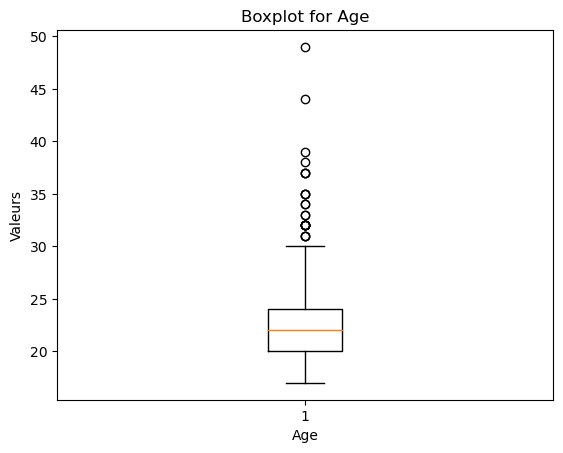

In [41]:
#checking outliers for the age, we decided to keep the data. 
plt.boxplot(reordered_data['age'])

plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')

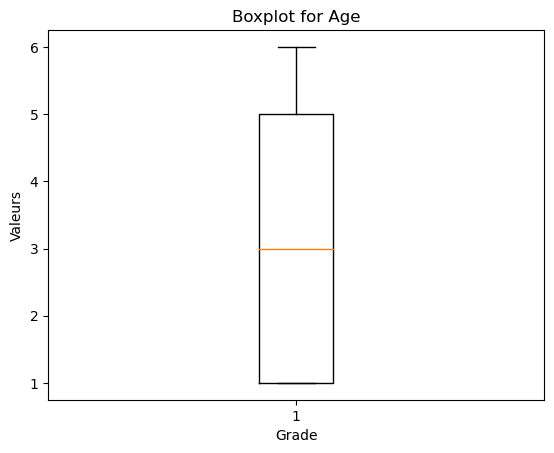

In [42]:
plt.boxplot(reordered_data['year'])

plt.title('Boxplot for Age')
plt.xlabel('Grade')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')

In [60]:
#importing csv file
reordered_data.to_csv("Med_Students_Updated_Dataset.csv", sep = ";", index = False)

/var/folders/2w/vhfbdjs16ws778lslztc15r00000gn/T/ipykernel_76645/4105749499.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = reordered_data.corr()


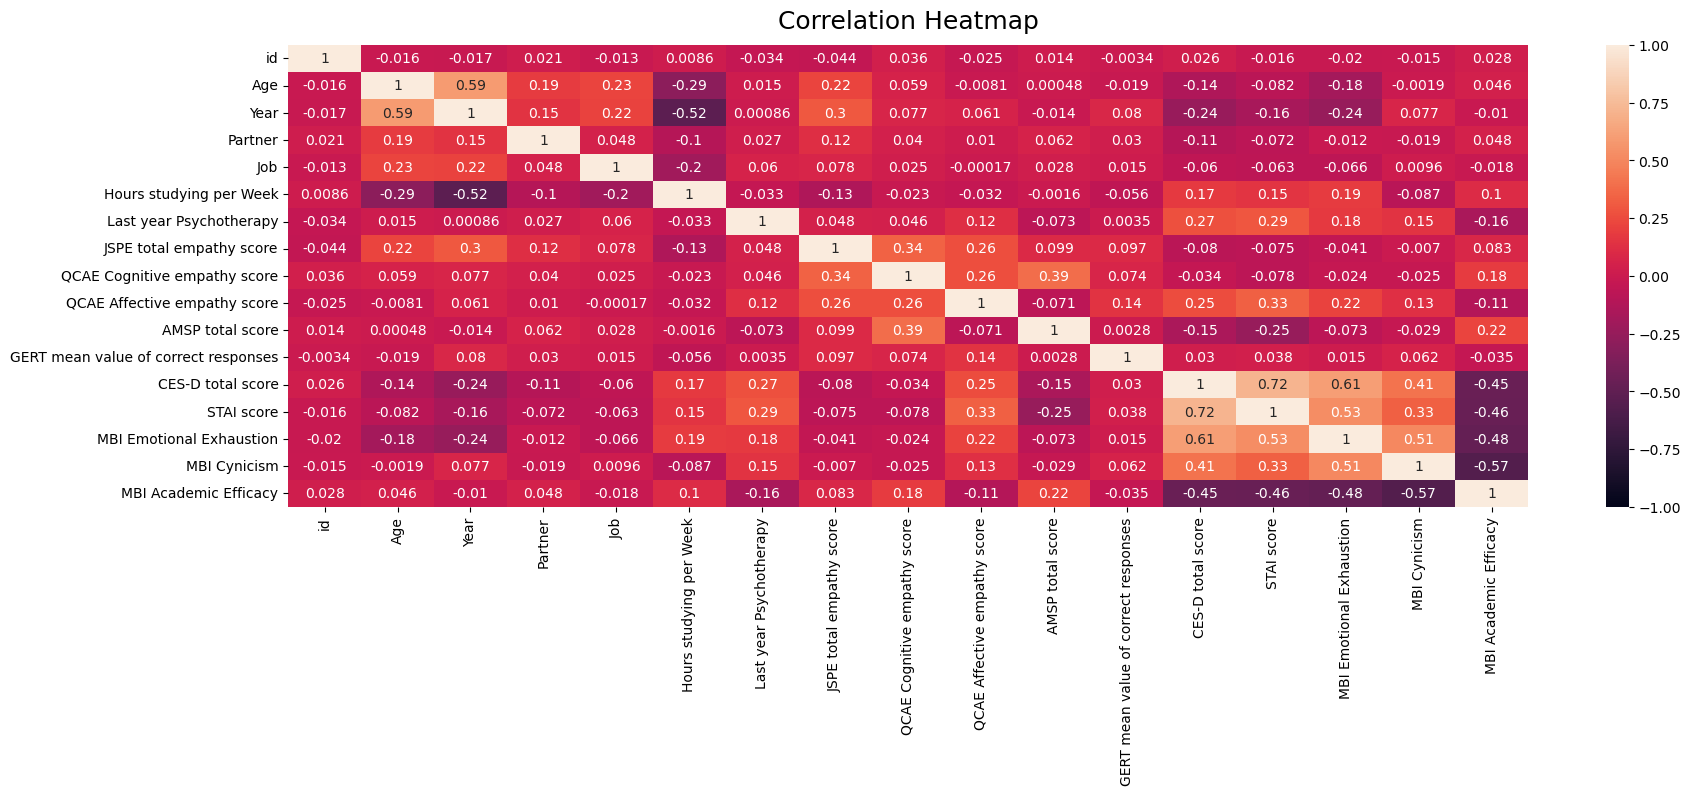

In [67]:
data_corr = reordered_data.corr()

plt.figure(figsize=(20, 6))

heatmap = sns.heatmap((data_corr), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('correlation_map.png')